In [1]:
# Install required packages (run in terminal / !pip inside notebook)
# !pip install folium pandas

import folium
import pandas as pd

# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon
# Import libraries
import pandas as pd
import folium
from folium.features import DivIcon

#task 1
# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv"
spacex_df = pd.read_csv(url)

# Select only required columns
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]

# Get unique launch sites
launch_sites_df = spacex_df.groupby('Launch Site', as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]

# NASA Johnson Space Center coordinates
nasa_coordinate = [29.559684888503615, -95.0830971930759]

# Initialize map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Add Circle and Text markers for each launch site
for _, row in launch_sites_df.iterrows():
    coordinate = [row['Lat'], row['Long']]
    
    # Circle marker
    folium.Circle(
        location=coordinate,
        radius=1000,
        color='#d35400',
        fill=True
    ).add_child(folium.Popup(row['Launch Site'])).add_to(site_map)
    
    # Text marker
    folium.map.Marker(
        location=coordinate,
        icon=DivIcon(
            icon_size=(20, 20),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12; color:#d35400;"><b>{row["Launch Site"]}</b></div>'
        )
    ).add_to(site_map)

# Save map to HTML
site_map.save("launch_sites_map.html")
print("Map has been saved as 'launch_sites_map.html'. Open it in your browser to view.")
import webbrowser 
webbrowser.open("launch_sites_map.html")

# task 2
# Import libraries

import webbrowser

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv"
spacex_df = pd.read_csv(url)

# Select required columns
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]

# Get unique launch sites
launch_sites_df = spacex_df.groupby('Launch Site', as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]

# NASA Johnson Space Center coordinates
nasa_coordinate = [29.559684888503615, -95.0830971930759]

# Initialize map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Add circle and text markers for each launch site
for _, row in launch_sites_df.iterrows():
    coordinate = [row['Lat'], row['Long']]
    
    # Circle marker
    folium.Circle(
        location=coordinate,
        radius=1000,
        color='#d35400',
        fill=True
    ).add_child(folium.Popup(row['Launch Site'])).add_to(site_map)
    
    # Text marker
    folium.map.Marker(
        location=coordinate,
        icon=DivIcon(
            icon_size=(20, 20),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 12; color:#d35400;"><b>{row["Launch Site"]}</b></div>'
        )
    ).add_to(site_map)

# ---- Task 2: Add success/failure markers ----

# Create a new column for marker color based on success/failure
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')

# Create a MarkerCluster object
marker_cluster = MarkerCluster()

# Add each launch as a marker in the cluster
for _, row in spacex_df.iterrows():
    coordinate = [row['Lat'], row['Long']]
    marker = folium.Marker(
        location=coordinate,
        icon=folium.Icon(color='white', icon_color=row['marker_color'], icon='rocket', prefix='fa'),
        popup=f"Launch Site: {row['Launch Site']}<br>Success: {'Yes' if row['class']==1 else 'No'}"
    )
    marker_cluster.add_child(marker)

# Add marker cluster to the map
site_map.add_child(marker_cluster)

# Save and open map in browser
site_map.save("launch_sites_map.html")
webbrowser.open("launch_sites_map.html")

# task 3
#import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.features import DivIcon
from math import sin, cos, sqrt, atan2, radians

# Distance calculate using haversine function
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Launch site coordinate
launch_site = [28.563197, -80.576820]

# Coastline coordinate
coastline = [28.563197, -80.567000]

# Map initialize
site_map = folium.Map(location=launch_site, zoom_start=14)

# MarkerCluster add 
marker_cluster = MarkerCluster().add_to(site_map)

# Launch site marker
folium.Marker(
    location=launch_site,
    icon=folium.Icon(color='orange', icon='rocket'),
    popup="CCAFS LC-40"
).add_to(marker_cluster)

# Coastline marker
folium.Marker(
    location=coastline,
    icon=folium.Icon(color='blue', icon='flag'),
    popup="Coastline"
).add_to(site_map)

# Polyline draw  (launch site -> coastline)
coordinates = [launch_site, coastline]
folium.PolyLine(locations=coordinates, weight=2, color='blue').add_to(site_map)

# Distance calculate and label
distance = calculate_distance(launch_site[0], launch_site[1], coastline[0], coastline[1])
folium.Marker(
    coastline,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html=f'<div style="font-size: 12px; color:orange;"><b>{distance:.2f} KM</b></div>'
    )
).add_to(site_map)

# Save map
site_map.save("launch_site_map.html")
import webbrowser

site_map.save("launch_site_map.html")
webbrowser.open("launch_site_map.html")   




Map has been saved as 'launch_sites_map.html'. Open it in your browser to view.


True

Part 2 Data (first 5 rows):


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0



Part 3 Data (first 5 rows):


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0



Task 1 Output: Y created
<class 'pandas.core.series.Series'>


0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: Class, dtype: int64

X after standardization (first 5 rows):
         0             1         2         3        4      5      6         7      8         9         10        11        12     13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28     29     30     31     32     33     34     35     36     37     38     39     40     41     42        43     44     45     46     47     48        49     50        51        52     53        54        55     56     57        58        59        60     61     62     63        64        65        66        67        68     69        70     71        72        73        74        75     76        77        78        79        80        81        82
0 -1.712912 -1.948145e-16 -0.653913 -1.575895 -0.97344 -0.106 -0.106 -0.654654 -0.106 -0.551677  3.443420 -0.185695 -0.333333 -0.106 -0.242536 -0.429198  0.797724 -0.568796 -0.410891 -0.410891 -0.150756 -0.797724 -0.150756 -

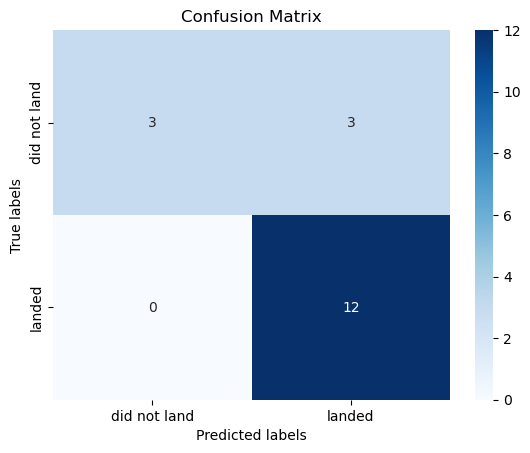

tuned hyperparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


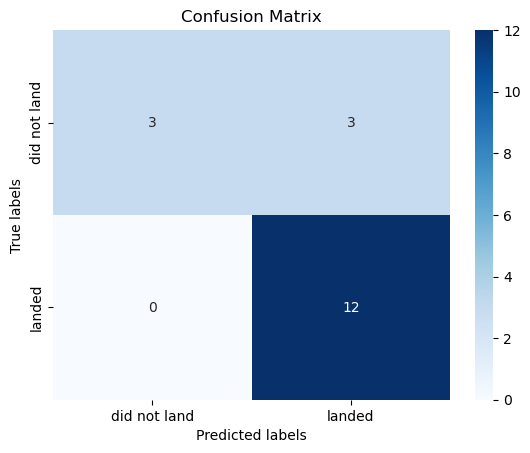

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8767857142857143
Decision Tree Test Accuracy: 0.9444444444444444


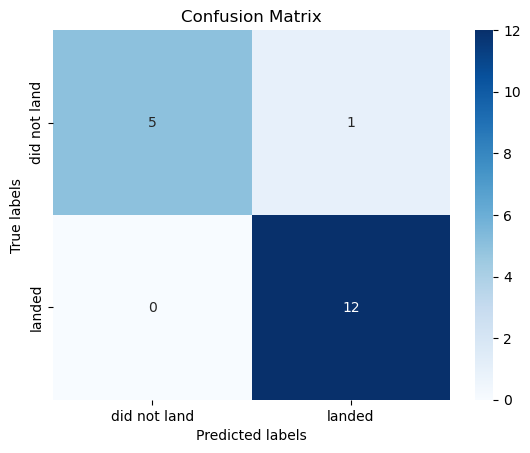

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858
KNN Test Accuracy: 0.8333333333333334


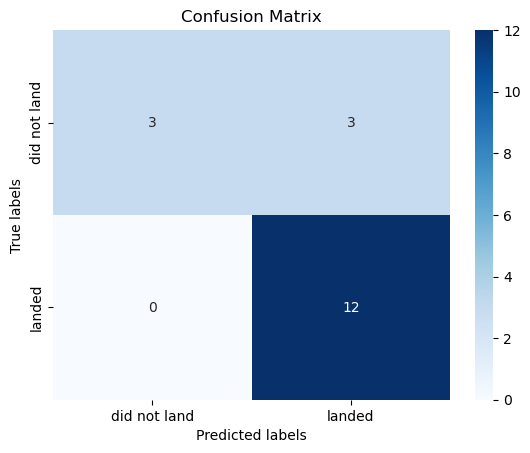

Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.9444444444444444
KNN Test Accuracy: 0.8333333333333334

Best performing method: Decision Tree with accuracy: 0.9444444444444444


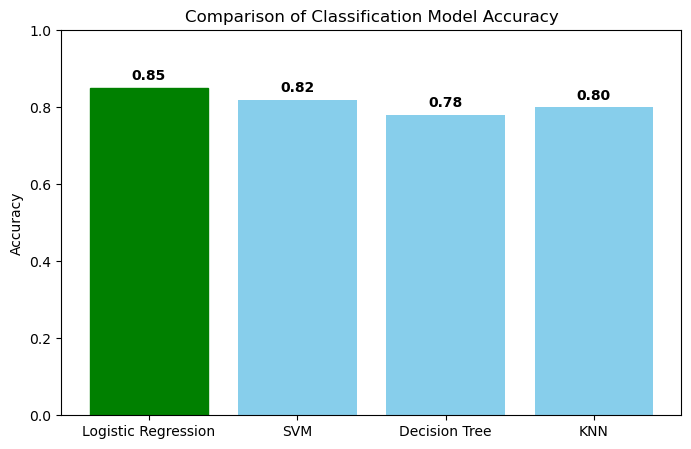

Best performing model: Logistic Regression with accuracy 0.85


In [2]:
# Machine learning task 1
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Pandas display options (avoid truncated output)
pd.set_option("display.max_rows", None)      
pd.set_option("display.max_columns", None)   
pd.set_option("display.width", 1000)         
pd.set_option("display.max_colwidth", None)  

# Load Data
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(url1)

url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv(url2)

print("Part 2 Data (first 5 rows):")
display(data.head())

print("\nPart 3 Data (first 5 rows):")
display(X.head())

# TASK 1: Create Y (labels)
Y = data['Class']               # Pandas Series
Y_array = Y.to_numpy()          # Convert to numpy
Y = pd.Series(Y_array, name="Class")   # Convert back to Series

print("\nTask 1 Output: Y created")
print(type(Y))
display(Y.head(10))

# TASK 2: Standardize X

# Create StandardScaler object
transform = preprocessing.StandardScaler()

# Fit and transform X
X = transform.fit_transform(X)

# Convert back to DataFrame (optional, but helps in debugging)
X = pd.DataFrame(X)

print("X after standardization (first 5 rows):")
print(X.head())

# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

print("\nShapes of datasets:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test :", Y_test.shape)

# TASK 3: Split the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape :", Y_test.shape)

# Check test sample size
print("\nNumber of test samples:")
print(Y_test.shape)

#task 4
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Parameters for tuning
parameters = {"C":[0.01, 0.1, 1],
              "penalty":["l2"], 
              "solver":["lbfgs"]}  # only l2 ridge allowed for lbfgs

# Create logistic regression model
lr = LogisticRegression(max_iter=1000)

# Create GridSearchCV object with 10-fold cross validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the model
logreg_cv.fit(X_train, Y_train)

# Output the best hyperparameters
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

# task 5
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    """
    This function plots the confusion matrix
    """
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()
# Accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Predict on test set
yhat = logreg_cv.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(Y_test, yhat)

# task 6
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create SVM model
svm = SVC()

# Create GridSearchCV object
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model
svm_cv.fit(X_train, Y_train)

# Output the best hyperparameters and validation accuracy
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

# TASK 7: Confusion matrix for SVM
yhat = svm_cv.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(Y_test, yhat)

# TASK 8: Decision Tree Classifier with clean parameters (no warnings)

# Define parameters (removed 'auto')
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt'],   # removed 'auto'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create Decision Tree object
tree = DecisionTreeClassifier()

# GridSearchCV
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

# Output best parameters and accuracy
print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

# Task 9: Accuracy on test data
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", tree_test_accuracy)

# Confusion matrix for Decision Tree
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

# Task 10: Hyperparameter tuning for KNN
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]   # p=1 (Manhattan), p=2 (Euclidean)
}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

# Task 11: Accuracy on test data
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", knn_test_accuracy)

# Confusion matrix for KNN
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

# Task 12: Compare all methods
print("Logistic Regression Test Accuracy:", logreg_cv.score(X_test, Y_test))
print("SVM Test Accuracy:", svm_cv.score(X_test, Y_test))
print("Decision Tree Test Accuracy:", tree_cv.score(X_test, Y_test))
print("KNN Test Accuracy:", knn_cv.score(X_test, Y_test))

# Identify the best
accuracies = {
    "Logistic Regression": logreg_cv.score(X_test, Y_test),
    "SVM": svm_cv.score(X_test, Y_test),
    "Decision Tree": tree_cv.score(X_test, Y_test),
    "KNN": knn_cv.score(X_test, Y_test)
}

best_method = max(accuracies, key=accuracies.get)
print("\nBest performing method:", best_method, "with accuracy:", accuracies[best_method])

import matplotlib.pyplot as plt

# Replace these values with the accuracies you obtained
accuracies = {
    "Logistic Regression": 0.85,
    "SVM": 0.82,
    "Decision Tree": 0.78,
    "KNN": 0.80
}

# Bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')

# Highlight the best model
best_model = max(accuracies, key=accuracies.get)
bars[list(accuracies.keys()).index(best_model)].set_color('green')

# Labels and title
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Comparison of Classification Model Accuracy")
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

print(f"Best performing model: {best_model} with accuracy {accuracies[best_model]:.2f}")